<a href="https://colab.research.google.com/github/genarioazevedoufape/atividades_pet_data_science/blob/main/%5BPET%5D_atividade_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import seaborn as sns

##Dados das Séries Temporais

Este conjunto de dados contém preços de ações do Financial Times - Exchange (FTSE), NIKKEI (Japão), SPX e DAX (Alemão) no intervalo entre 1994 - 2018.

### Análise dos dados

In [ ]:
path = 'https://raw.githubusercontent.com/genarioazevedoufape/atividades_pet_data_science/main/times_series/Mercados%20financeiros/Index2018.csv'
dados = pd.read_csv(path)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [ ]:
dados.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [ ]:
dados.tail()

,date,spx,dax,ftse,nikkei
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88
6268,29/01/2018,2853.528411,13324.48,7671.533300,23629.34


In [ ]:
dados.date = pd.to_datetime(dados.date, format='%d/%m/%Y')

In [ ]:
dados.set_index('date', inplace=True)

<Axes: xlabel='date'>

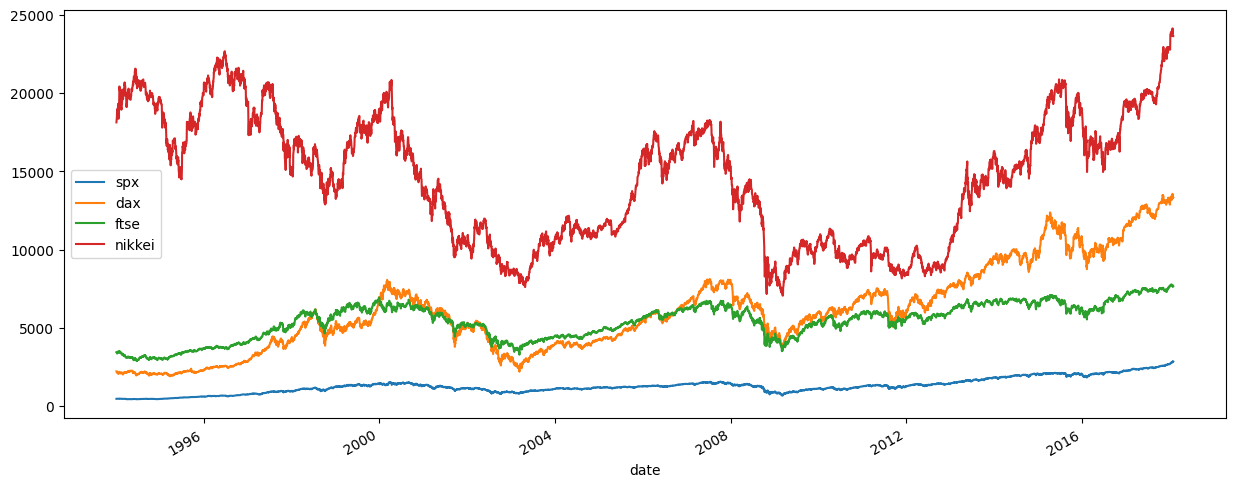

In [ ]:
dados.plot()

## Série Temporal DAX

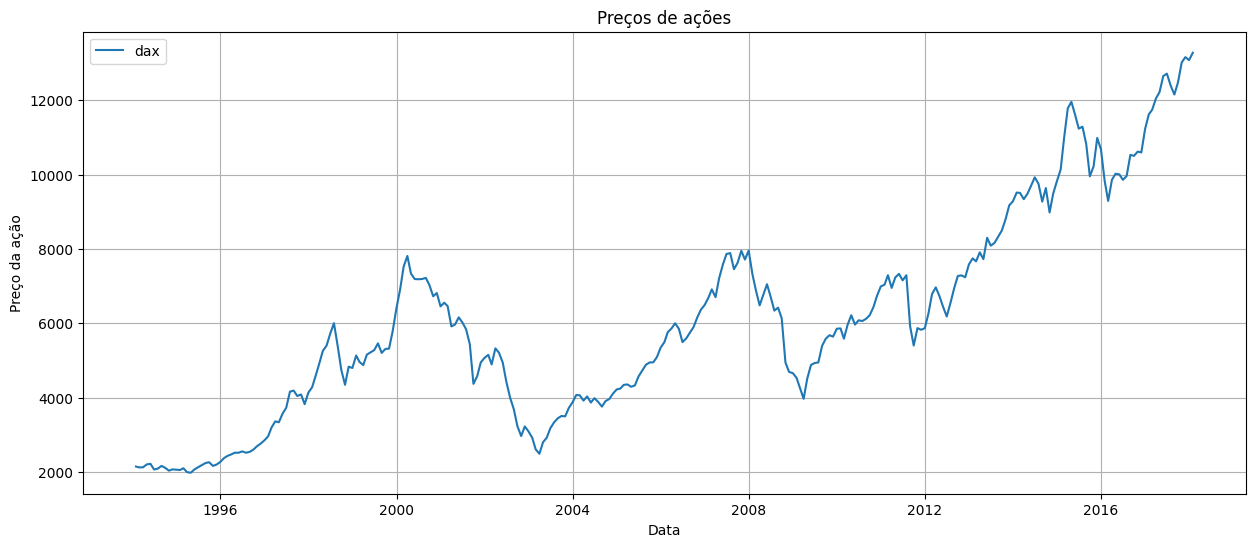

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(dados.index, dados['dax'], label='dax')
plt.xlabel('Data')
plt.ylabel('Preço da ação')
plt.title('Preços de ações')
plt.legend()
plt.grid(True)
plt.show()

O gráfico mostra uma tendência de alta. Existem flutuações notáveis ao longo do tempo, com picos e vales evidentes.

###Análise de Tendência ROLLING / Média Movél

In [ ]:
media = dados['dax'].rolling(window = 30, min_periods = 10).mean()
desv = dados['dax'].rolling(window = 30,  min_periods = 10).std()

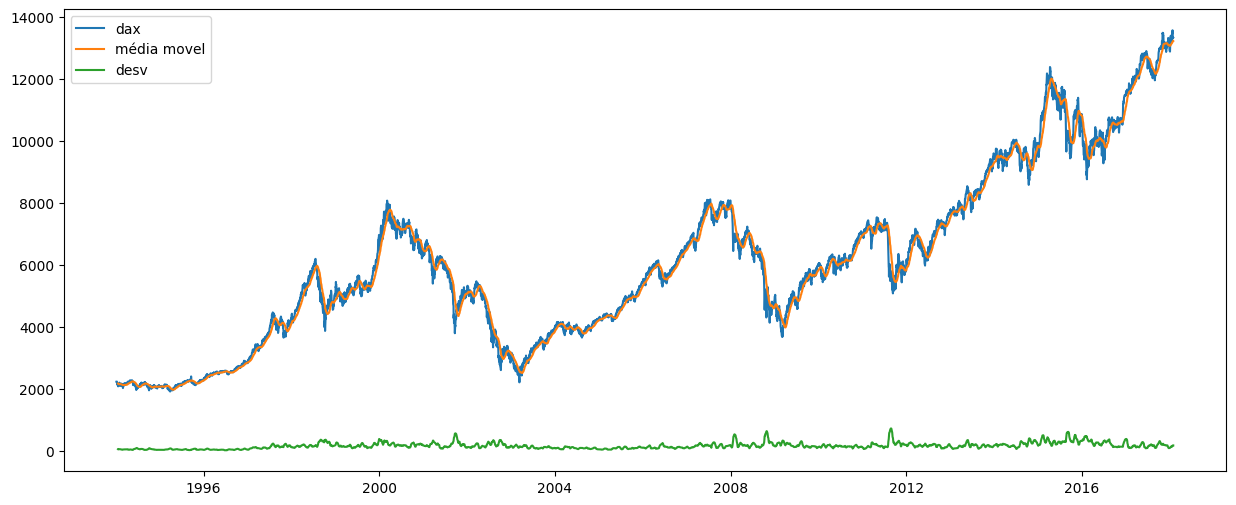

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(dados['dax'], label = 'dax')
plt.plot(media, label = 'média movel')
plt.plot(desv, label = 'desv')
plt.legend(loc='best')
plt.show()

A média móvel em relação a ação DAX é calculada com uma janela de 30 dias e requer pelo menos 10 observações não nulas para calcular cada ponto na série. Isso garante que a média móvel seja calculada apenas quando houver dados suficientes disponíveis. Observamos uma tendência geral de alta ao longo do tempo. Isso sugere que o preço da ação tende a alta. A proximidade entre a média móvel e os dados originais demonstra uma correlação forte, significando que a média móvel é um bom representante do comportamento dos dados.

### Analise dos componentes da série temporal
**Análise da Sazonalidade**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
dados_mensais = dados.resample('M').mean()

In [ ]:
decomposicao = seasonal_decompose(dados_mensais['dax'], model='multiplicative')

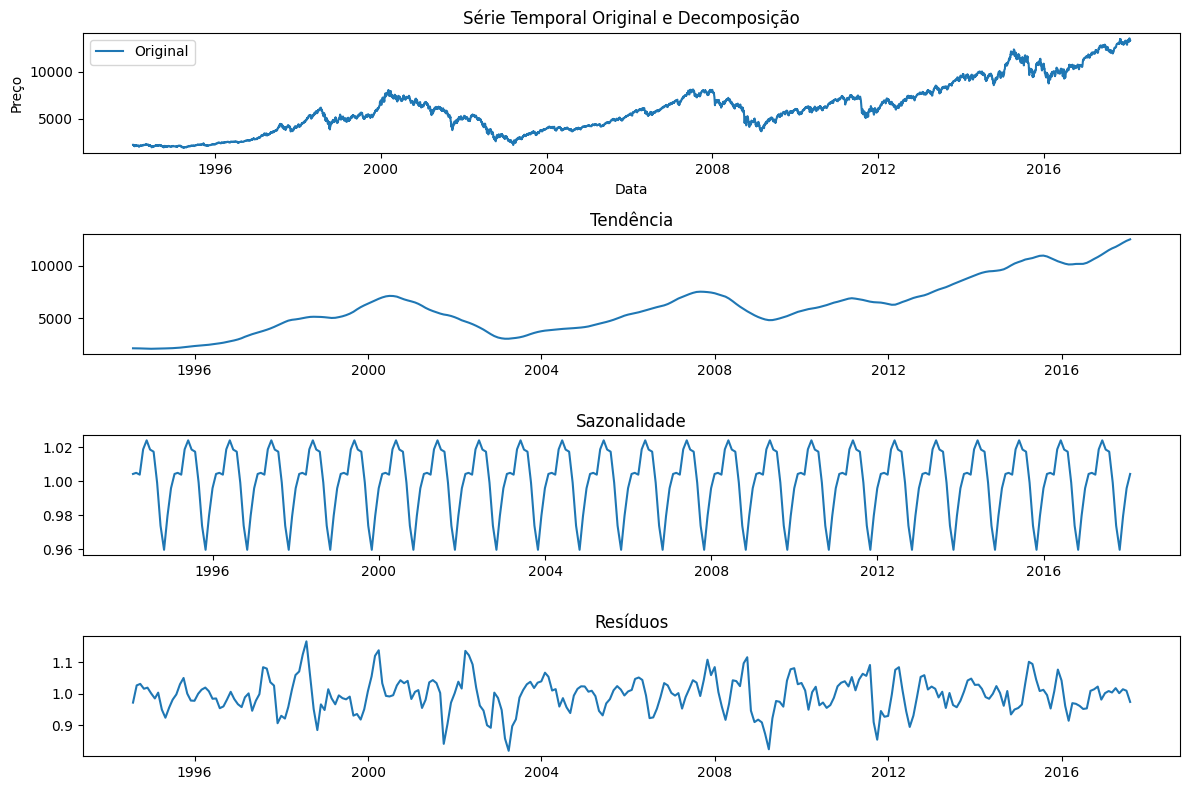

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(dados.index, dados['dax'], label='Original')
plt.title('Série Temporal Original e Decomposição')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()

plt.subplot(412)
plt.plot(decomposicao.trend)
plt.title('Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal)
plt.title('Sazonalidade')

plt.subplot(414)
plt.plot(decomposicao.resid)
plt.title('Resíduos')

plt.tight_layout()
plt.show()

Observações:


*   A série temporal mostra uma tendência ascendente, indicando um aumento ao longo do tempo.

*  As flutuações regulares sugerem padrões sazonais.

*  As variações irregulares em torno de um valor central indicam que há fatores aleatórios afetando a série temporal.

A tendência suave e a sazonalidade clara indicam que a série temporal é consistente e previsível até certo ponto.

In [ ]:
import statsmodels.api as sm

<Figure size 1500x600 with 0 Axes>

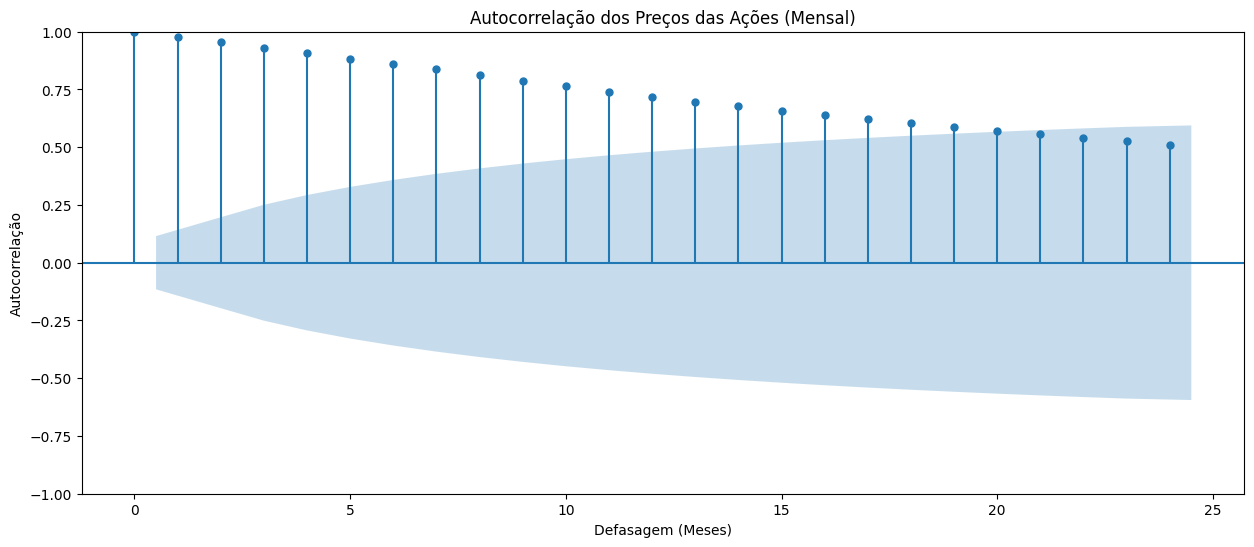

In [ ]:
plt.figure(figsize=(15, 6))
sm.graphics.tsa.plot_acf(dados_mensais['dax'], lags=24)
plt.title('Autocorrelação dos Preços das Ações (Mensal)')
plt.xlabel('Defasagem (Meses)')
plt.ylabel('Autocorrelação')
plt.show()


O gráfico indica uma autocorrelação positiva. E a diminuição da correlação indicando uma tendência na distribuição dos dadsos. À medida que a defasagem aumenta, próximo aos 20 meses, a autocorrelação diminui, sugerindo que os preços das ações estão menos correlacionados com valores mais distantes no tempo.

> A função de autocorrelação (FAC), mede o grau de correlação de uma variável, em um dado instante, consigo mesma, em um instante de tempo posterior,


###Teste ADF

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(dados_mensais.dax)
print('Estatística do teste ADF:', result[0])
print('Valor-p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t{}: {:.3f}'.format(key, value))


Estatística do teste ADF: 0.007768492603884336
Valor-p: 0.9591698391547631
Valores críticos:
	1%: -3.454
	5%: -2.872
	10%: -2.572


 Com base nos resultados do teste ADF, não podemos considerar os dados como estacionários. Isso sugere que os preços das ações possuem algum tipo de tendência ou padrão que varia ao longo do tempo.

>O teste ADF (Augmented Dickey-Fuller) é um teste estatístico usado para determinar se uma série temporal tem raiz unitária, o que significa que a série temporal é não estacionária. Se a série temporal não for estacionária, isso pode indicar a presença de tendências ou padrões que mudam ao longo do tempo.

###Previsão SARIMAX


In [ ]:
train_size = int (len(dados) * 0.8)

In [ ]:
train, test = dados[:train_size], dados[train_size:]

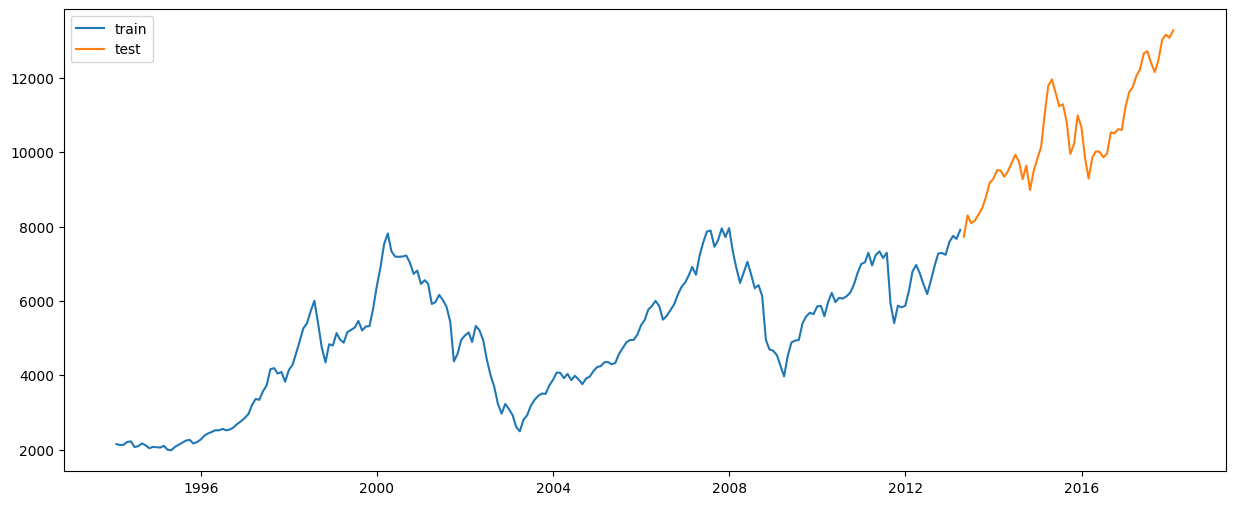

In [ ]:
plt.plot(train.dax, label = 'train')
plt.plot(test.dax, label = 'test')
plt.legend(loc = 'best')
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

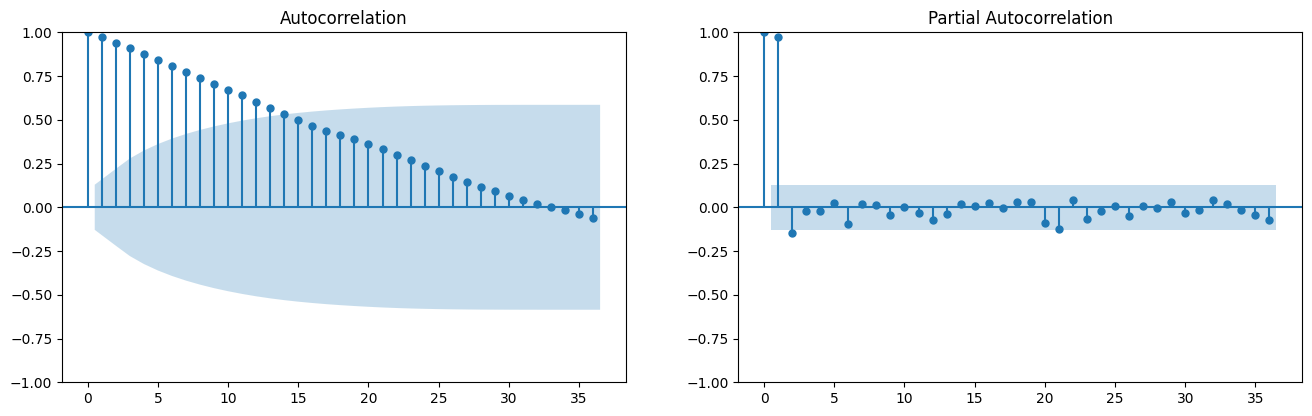

In [ ]:
acf_pacf(train.dax, 36)

In [ ]:
def teste_estacionaria(serie):
  p_value = adfuller(serie)[1]
  print(p_value)
  if p_value < 0.05:
    print("Série estacionária")
  else:
    print("Série não estacionária")

In [ ]:
# Aplicando o diff
teste_estacionaria(train.dax.diff(1).dropna())

1.8859880864030794e-20
Série estacionária


<Axes: xlabel='date'>

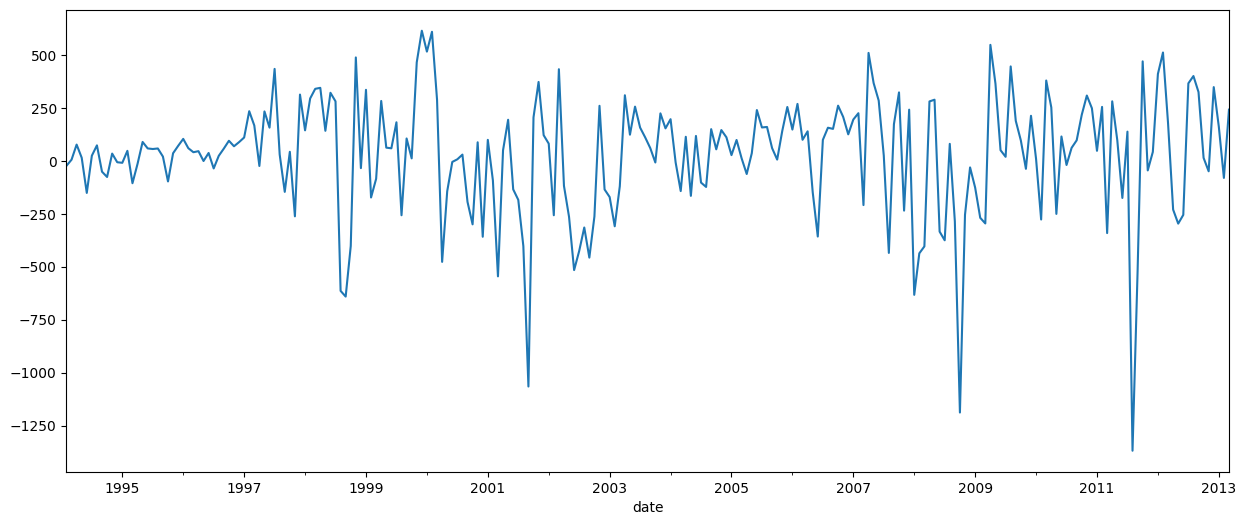

In [ ]:
train.dax.diff(1).dropna().plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
import itertools

p_values = range(0, 1)
d = 1
q_values = range(1, 15)

param_combinations = list(itertools.product(p_values, [d], q_values))

best_aic = float("inf")
best_params = None

for param in param_combinations:
    try:
        model = SARIMAX(train.dax, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
    except:
        continue

print("Melhores parâmetros (p, d, q):", best_params)
print("Melhor AIC:", best_aic)


Melhores parâmetros (p, d, q): (0, 1, 1)
Melhor AIC: 3230.308806948654


O AIC é uma métrica estatística usada para avaliar a qualidade relativa dos modelos estatísticos. Quanto menor o valor do AIC, melhor é o ajuste do modelo aos dados.

In [ ]:
model = SARIMAX(train.dax,
                order = (best_params)
                ).fit()

In [ ]:
prev_train = model.predict()

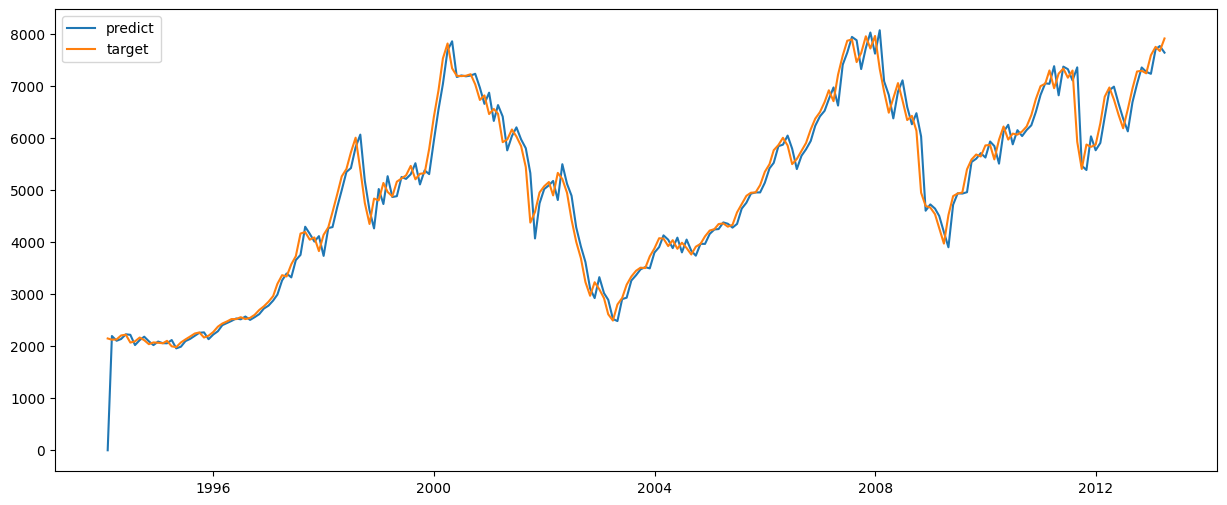

In [ ]:
plt.plot(prev_train, label = 'predict')
plt.plot(train.dax, label = 'target')
plt.legend(loc = 'best')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error

In [ ]:
RMSE = np.sqrt(mean_squared_error(train.dax, prev_train))
print("RMSE:", RMSE)

RMSE: 303.2717430199619


In [ ]:
mape = MAPE(train.dax, prev_train)
print("Média das porcentagens absolutas dos erros (MAPE):", mape)

Média das porcentagens absolutas dos erros (MAPE): 0.04298915905009972


In [ ]:
prev_test = model.forecast(len(test.dax))

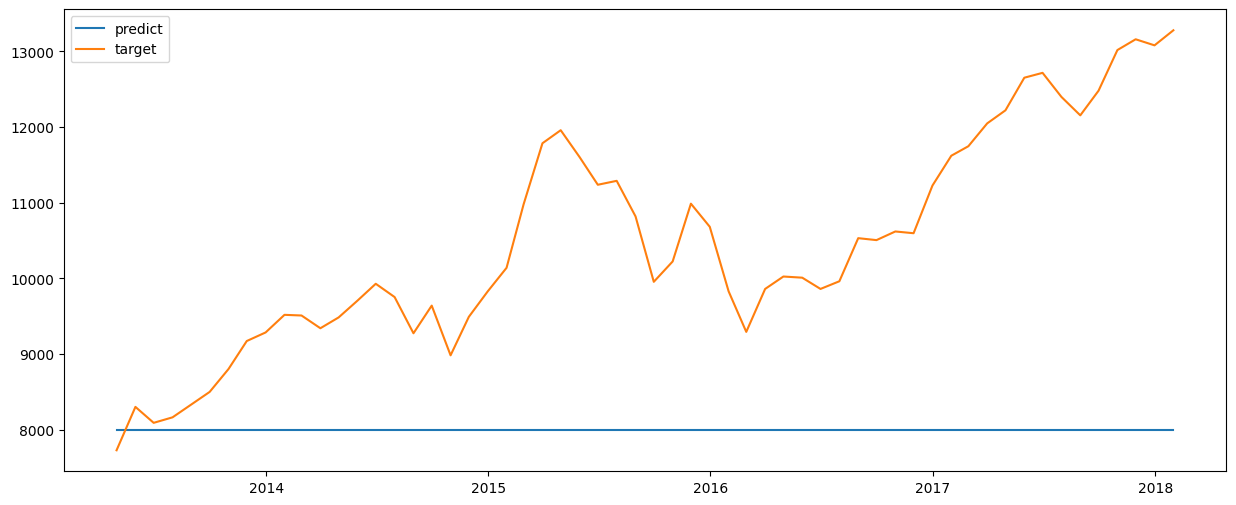

In [ ]:
plt.plot(prev_test, label = 'predict')
plt.plot(test.dax, label = 'target')
plt.legend()
plt.show()

 Quando um gráfico da série temporal parece quase horizontal, sem tendência óbvia para cima ou para baixo, dizemos que a série está exibindo um comportamento flat.

In [ ]:
RMSE = np.sqrt(mean_squared_error(test.dax, prev_test))
print("RMSE:", RMSE)

RMSE: 2855.546604078934


In [ ]:
mape = MAPE(test.dax, prev_test)
print("MAPE:", mape)

MAPE: 0.22340822777332164


In [ ]:
ruido = train.dax - prev_train

<Axes: xlabel='date'>

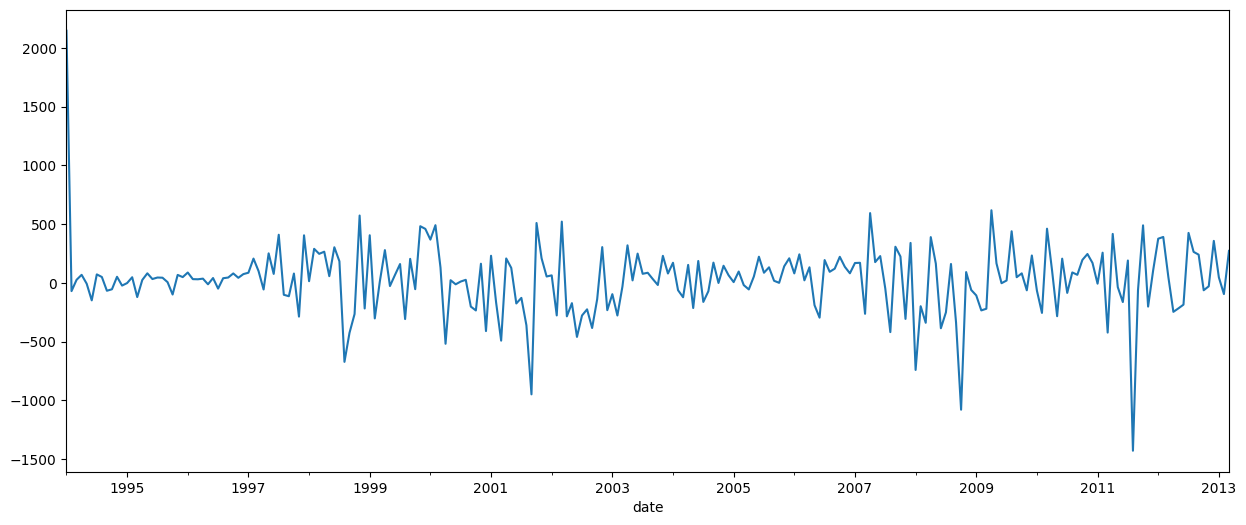

In [ ]:
ruido.plot()

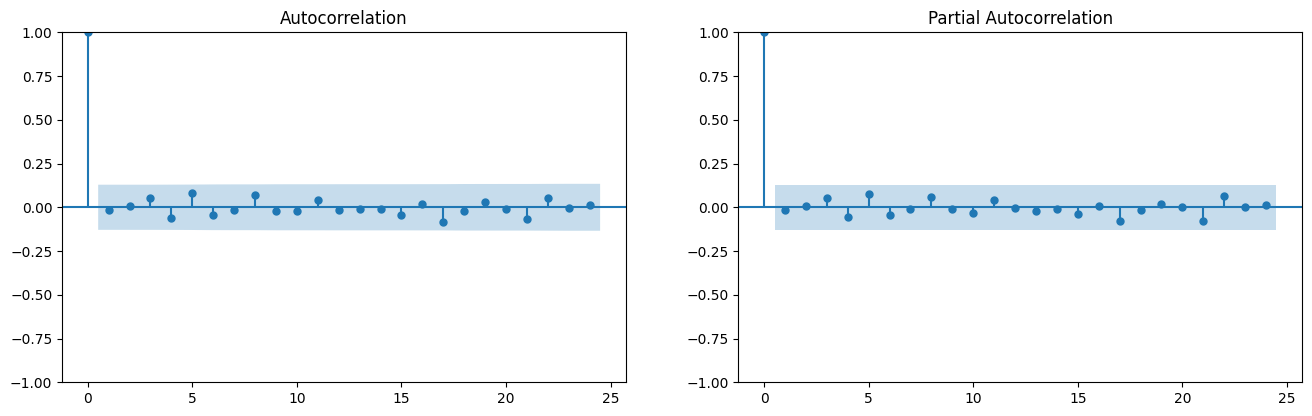

In [ ]:
acf_pacf(ruido, 24)

## Série Temporal SPX

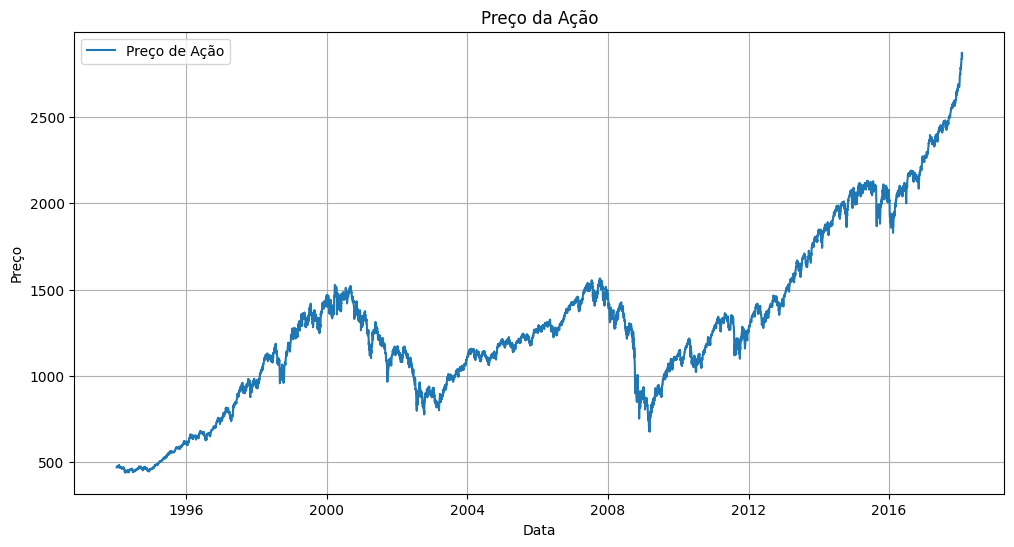

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dados.index, dados['spx'], label='Preço de Ação')
plt.title('Preço da Ação')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.show()

####Análise de Tendência ROLLING / Média Movél

In [ ]:
media = dados['spx'].rolling(window = 30, min_periods = 14).mean()
desv = dados['spx'].rolling(window = 30,  min_periods = 14).std()

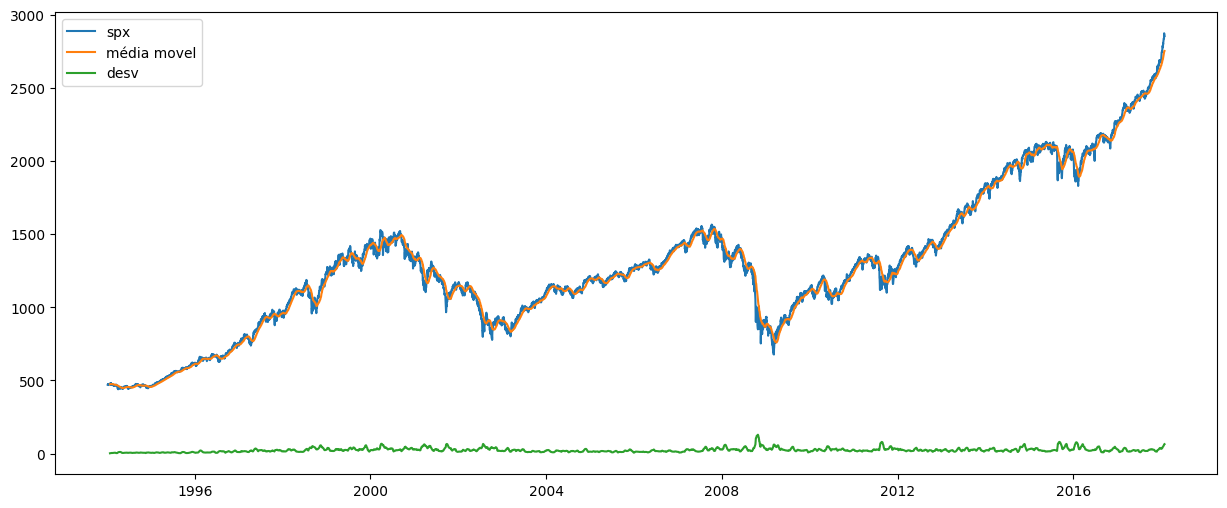

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(dados['spx'], label = 'spx')
plt.plot(media, label = 'média movel')
plt.plot(desv, label = 'desv')
plt.legend(loc='best')
plt.show()

A média móvel em relação a ação SPX é calculada com uma janela de 30 dias e requer pelo menos 14 observações não nulas para calcular cada ponto na série. Isso garante que a média móvel seja calculada apenas quando houver dados suficientes disponíveis. Observamos uma tendência geral de alta ao longo de todo período. A proximidade entre a média móvel e os dados originais demonstra uma correlação forte, significando que a média móvel é um bom representante do comportamento dos dados.

#### Analise dos componentes da série temporal
**Análise da Sazonalidade**

In [ ]:
dados = dados.resample('M').mean()

In [ ]:
decomposicao = seasonal_decompose(dados['spx'], model='multiplicative')

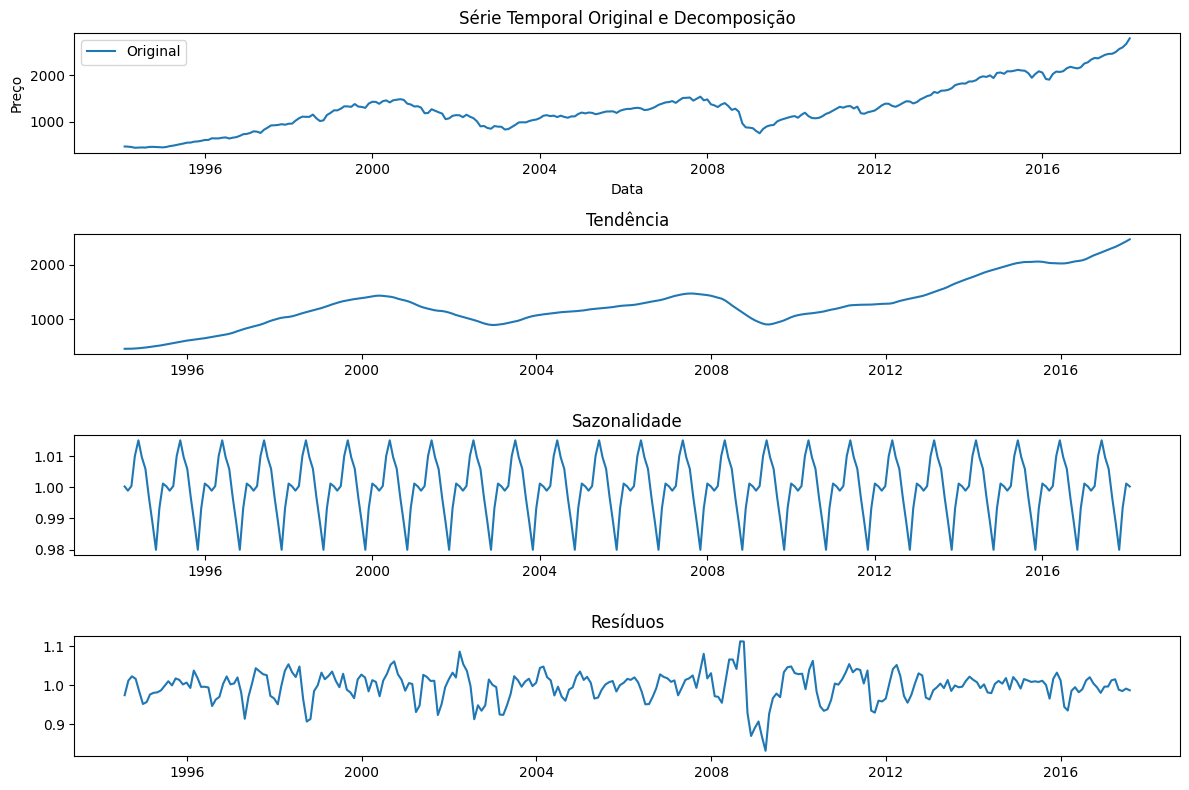

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(dados.index, dados['spx'], label='Original')
plt.title('Série Temporal Original e Decomposição')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()

plt.subplot(412)
plt.plot(decomposicao.trend)
plt.title('Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal)
plt.title('Sazonalidade')

plt.subplot(414)
plt.plot(decomposicao.resid)
plt.title('Resíduos')

plt.tight_layout()
plt.show()

Observações:

* A série temporal mostra uma tendência ascendente, indicando um aumento ao longo
do tempo.

* As flutuações regulares sugerem padrões sazonais.

* As variações irregulares em torno de um valor central indicam que há fatores aleatórios afetando a série temporal.

A tendência suave e a sazonalidade clara indicam que a série temporal é consistente e previsível até certo ponto.

<Figure size 1500x600 with 0 Axes>

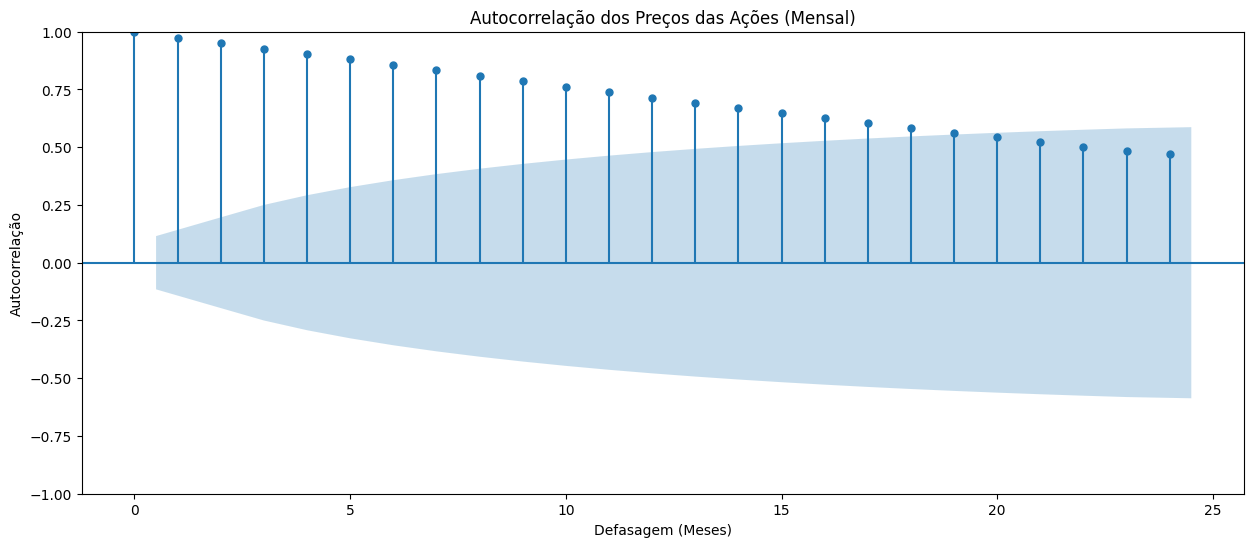

In [ ]:
plt.figure(figsize=(15, 6))
sm.graphics.tsa.plot_acf(dados['spx'], lags=24)
plt.title('Autocorrelação dos Preços das Ações (Mensal)')
plt.xlabel('Defasagem (Meses)')
plt.ylabel('Autocorrelação')
plt.show()


O gráfico indica uma autocorrelação positiva. À medida que a defasagem aumenta, próximo após os 18 meses, a autocorrelação diminui, sugerindo que os preços das ações estão menos correlacionados com valores mais distantes no tempo.


####Teste de ADF

In [ ]:
result = adfuller(dados.spx)
print('Estatística do teste ADF:', result[0])
print('Valor-p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t{}: {:.3f}'.format(key, value))


Estatística do teste ADF: 0.5819097062301414
Valor-p: 0.9871611422562346
Valores críticos:
	1%: -3.454
	5%: -2.872
	10%: -2.572


Com base nos resultados do teste ADF, não podemos considerar os dados como estacionários. Isso sugere que os preços das ações possuem algum tipo de tendência ou padrão que varia ao longo do tempo.

###Previsão SARIMAX


In [ ]:
train_size = int (len(dados) * 0.8)

In [ ]:
train, test = dados[:train_size], dados[train_size:]

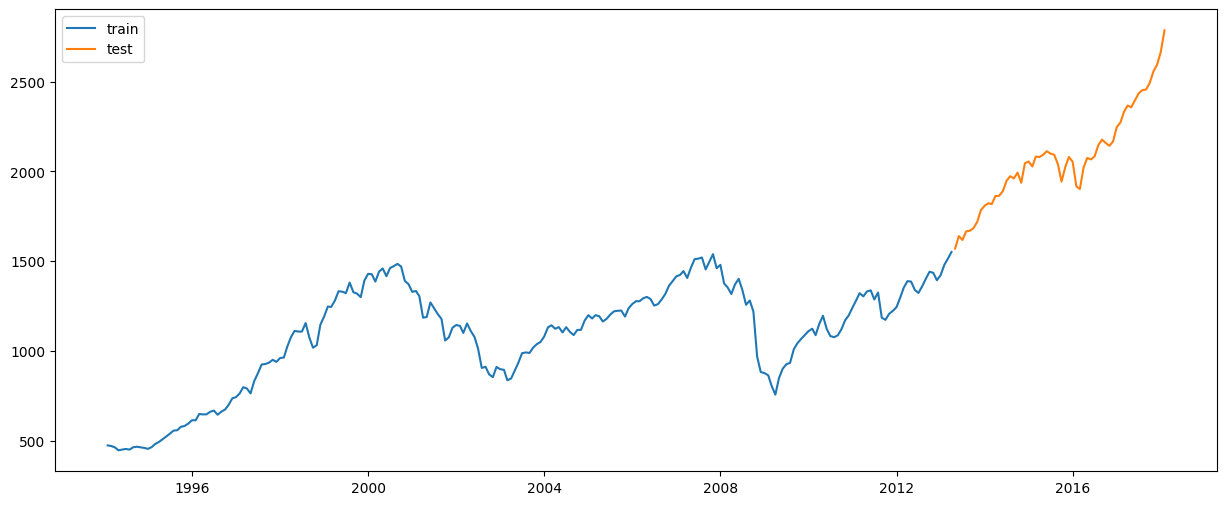

In [ ]:
plt.plot(train.spx, label = 'train')
plt.plot(test.spx, label = 'test')
plt.legend(loc = 'best')
plt.show()

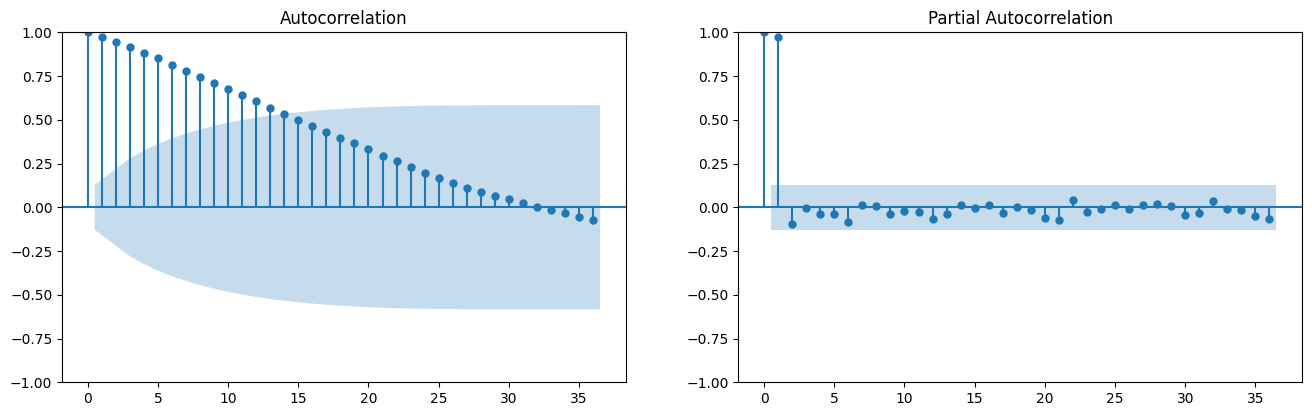

In [ ]:
acf_pacf(train.spx, 36)

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
def teste_estacionaria_kpss(serie):
    kpss_stat, p_value, lags, critical_values = kpss(serie)
    print("Estatística KPSS:", kpss_stat)
    print("Valor p:", p_value)
    print("Valores críticos:", critical_values)
    if p_value < 0.05:
      print("Série não é estacionária")
    else:
      print("Série é estacionária")

In [ ]:
teste_estacionaria_kpss(train.spx.diff(1).dropna())

Estatística KPSS: 0.1174593587186316
Valor p: 0.1
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Série é estacionária


<ipython-input-77-f6118dd98df0>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(serie)


<Axes: xlabel='date'>

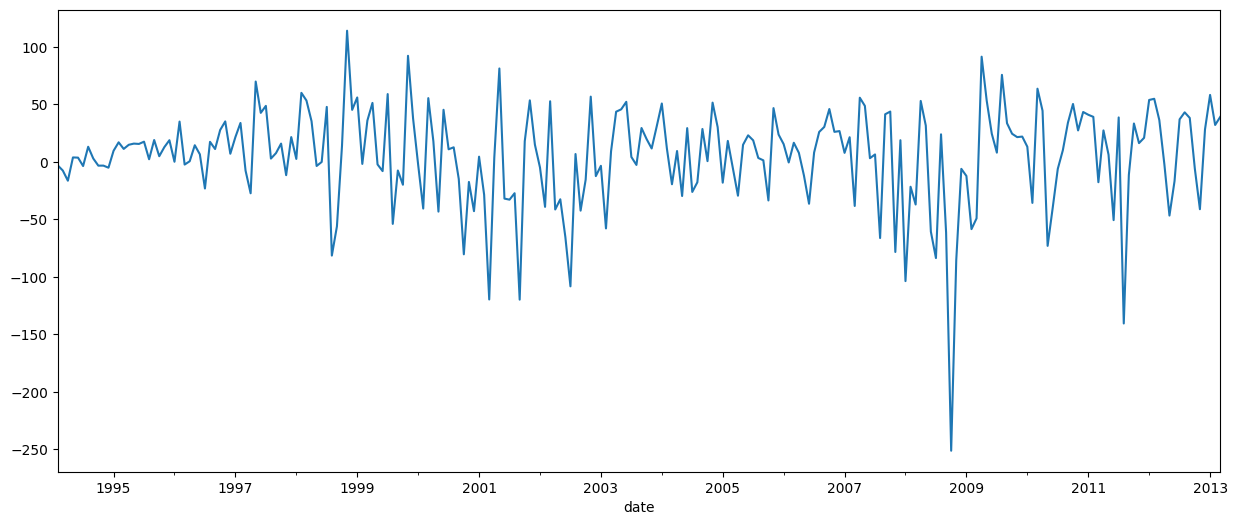

In [ ]:
train.spx.diff(1).dropna().plot()

In [ ]:
import itertools

p_values = range(0, 1)
d = 1
q_values = range(0, 15)

param_combinations = list(itertools.product(p_values, [d], q_values))

best_aic = float("inf")
best_params = None

for param in param_combinations:
    try:
        model = SARIMAX(train.spx, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
    except:
        continue

print("Melhores parâmetros (p, d, q):", best_params)
print("Melhor AIC:", best_aic)

Melhores parâmetros (p, d, q): (0, 1, 1)
Melhor AIC: 2375.001547297591


In [ ]:
model = SARIMAX(train.spx,
                order = (best_params),
                ).fit()

In [ ]:
prev_train = model.predict()

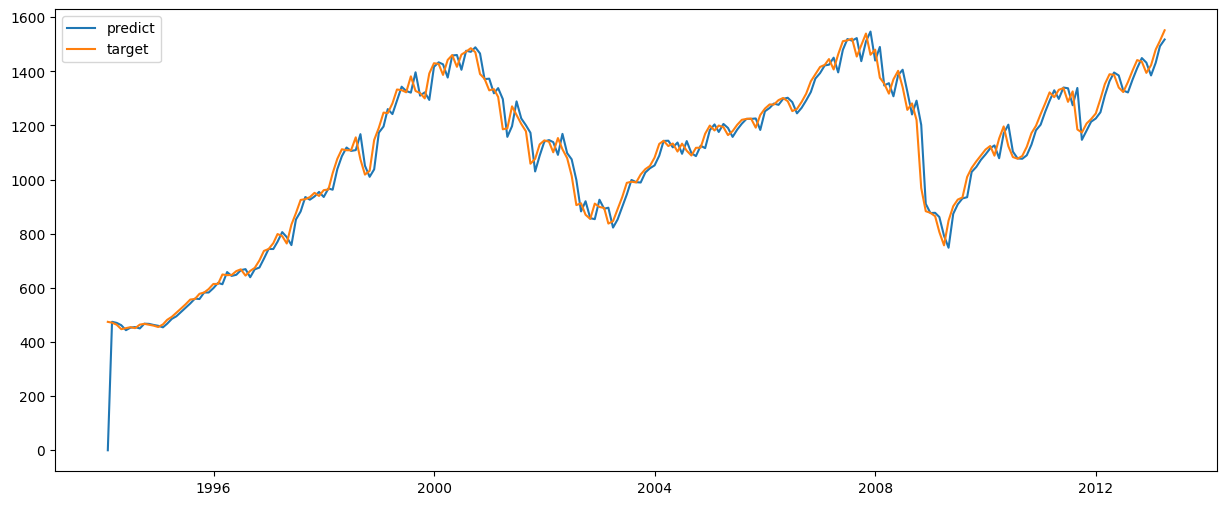

In [ ]:
plt.plot(prev_train, label = 'predict')
plt.plot(train.spx, label = 'target')
plt.legend(loc = 'best')
plt.show()

In [ ]:
mape = MAPE(train.spx, prev_train)
print("Média das porcentagens absolutas dos erros (MAPE):", mape)

Média das porcentagens absolutas dos erros (MAPE): 0.031991347792652364


In [ ]:
prev_test = model.forecast(len(test.spx))

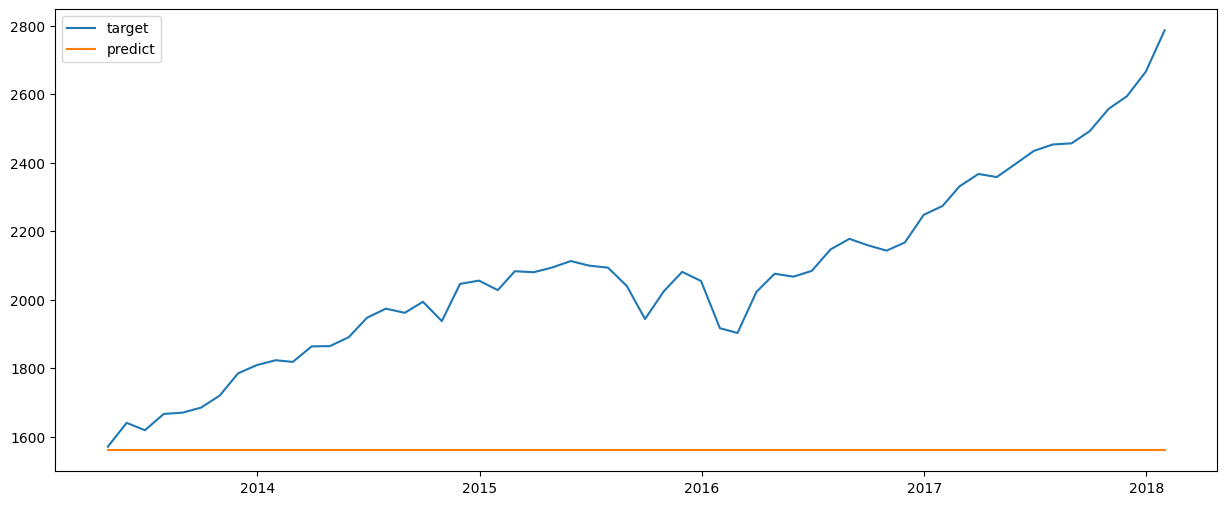

In [ ]:
plt.plot(test.spx, label = 'target')
plt.plot(prev_test, label = 'predict')
plt.legend()
plt.show()

In [ ]:
MAPE(test.spx, prev_test)

0.23552223886086587

In [ ]:
ruido = train.spx - prev_train

<Axes: xlabel='date'>

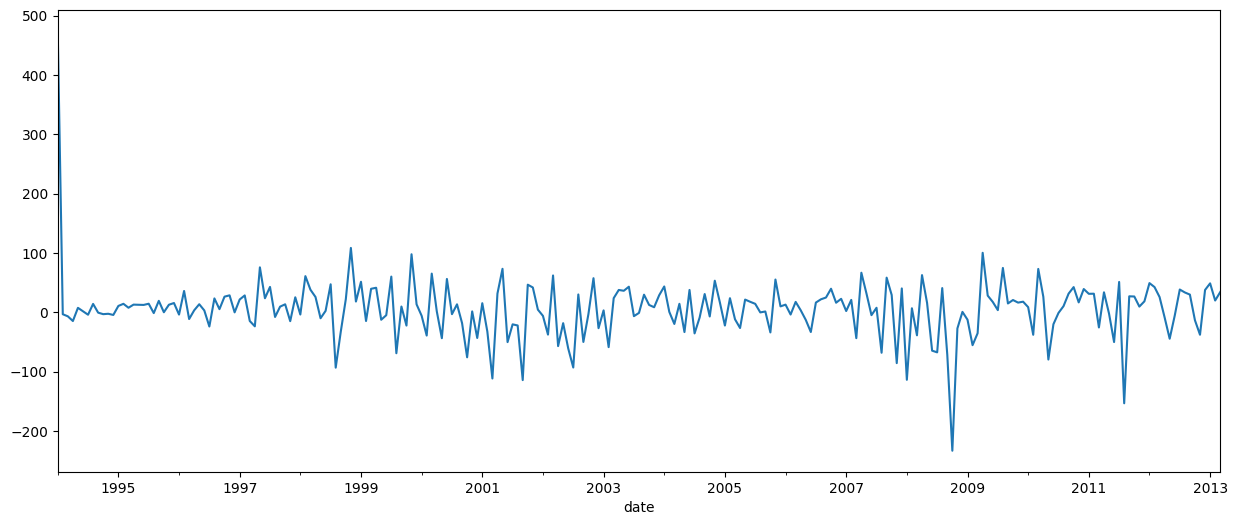

In [ ]:
ruido.plot()

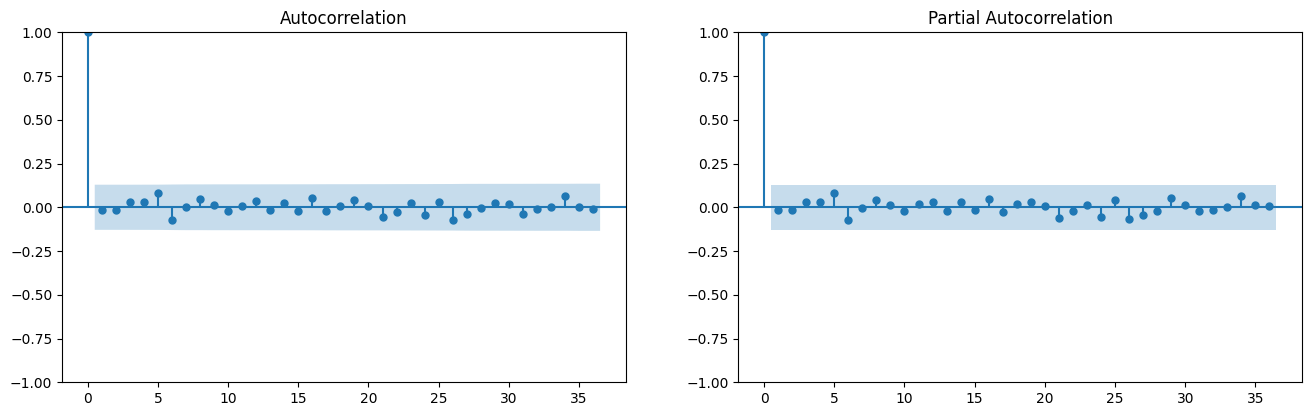

In [ ]:
acf_pacf(ruido, 36)